In [1]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing_extensions import TypedDict
from langchain_core.runnables.graph_mermaid import MermaidDrawMethod

In [2]:
class State(TypedDict):
    graph_state: str

In [3]:
def read_node(state : State) -> State:
    print("Reading Node")
    return {"graph_state": state['graph_state'] +" Reading "}

def process_node(state : State) -> State:
    print("Processing Node")
    return {"graph_state": state['graph_state'] +" Processing "}

def write_node(state : State) -> State:
    print("Writining Node")
    return {"graph_state": state['graph_state'] +" Writing "}

In [4]:
# Build graph
builder = StateGraph(State) 
builder.add_node("read", read_node)
builder.add_node("process", process_node)
builder.add_node("write", write_node)

In [5]:
# Edge define the flow by connecting nodes 
builder.add_edge(START, "read")
builder.add_edge("read", "process")
builder.add_edge("process", "write")
builder.add_edge("write", END)

In [6]:
# Create graph
graph = builder.compile()

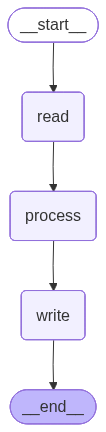

In [7]:
# Display Graph
display(Image(graph.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [8]:
# Invoke graph with initial state 
result = graph.invoke({"graph_state" : "Started "})
print(result)

Reading Node
Processing Node
Writining Node
{'graph_state': 'Started  Reading  Processing  Writing '}
